<a href="https://colab.research.google.com/github/GitAlberto/Projet-Kmeans/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mode manuel, nous faisons d'abord sans créer de fonction globale

<h3>Etape 1 : Définition du dataset et visualisation initiale</h3>

In [ ]:
# Importation des librairies
points = [
[1.5, 88], [2.0, 84],  [3.2, 90], [0.8, 86],[1.2, 91],
[2.8, 83], [3.5, 89],  [1.7, 87], [2.3, 92],[0.9, 85],
[3.0, 80], [2.4, 93],  [1.8, 82], [2.7, 89],[3.1, 88],
[1.6, 90], [2.9, 86],  [5.1, 78], [6.3, 74],[7.5, 70],
[8.0, 68], [6.8, 73],  [7.2, 76], [5.5, 77],[6.0, 69],
[8.5, 72], [5.8, 75],  [7.0, 79], [8.2, 67],[6.6, 71],
[5.4, 74], [7.8, 70],  [8.1, 73], [6.9, 76],[10.2, 63],
[12.5, 59],[13.8, 55], [11.6, 61], [14.1, 57],[10.9, 60],
[12.0, 62],[13.2, 54], [11.4, 58], [14.5, 56],[10.7, 63],
[12.8, 59],[13.0, 55], [11.2, 60], [14.0, 52],[12.3, 58]
]
print(points)

[[1.5, 88], [2.0, 84], [3.2, 90], [0.8, 86], [1.2, 91], [2.8, 83], [3.5, 89], [1.7, 87], [2.3, 92], [0.9, 85], [3.0, 80], [2.4, 93], [1.8, 82], [2.7, 89], [3.1, 88], [1.6, 90], [2.9, 86], [5.1, 78], [6.3, 74], [7.5, 70], [8.0, 68], [6.8, 73], [7.2, 76], [5.5, 77], [6.0, 69], [8.5, 72], [5.8, 75], [7.0, 79], [8.2, 67], [6.6, 71], [5.4, 74], [7.8, 70], [8.1, 73], [6.9, 76], [10.2, 63], [12.5, 59], [13.8, 55], [11.6, 61], [14.1, 57], [10.9, 60], [12.0, 62], [13.2, 54], [11.4, 58], [14.5, 56], [10.7, 63], [12.8, 59], [13.0, 55], [11.2, 60], [14.0, 52], [12.3, 58]]


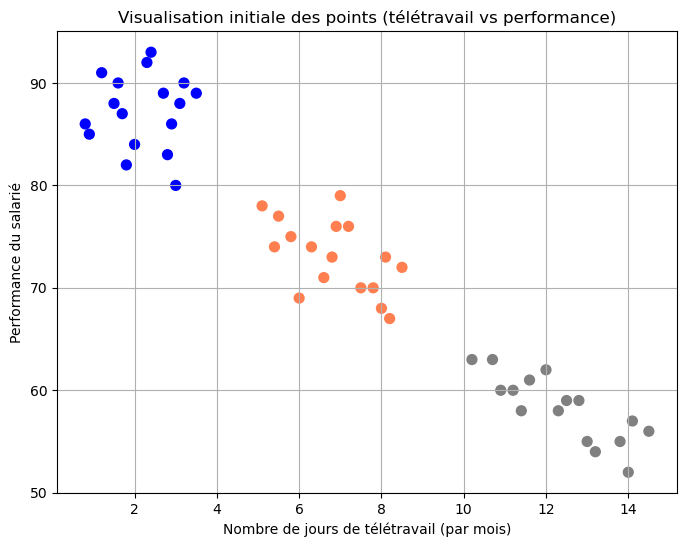

In [ ]:
# Importation de la librairie matplotlib
import matplotlib.pyplot as plt

# Séparation des coordonnées X et Y
x = [p[0] for p in points]
y = [p[1] for p in points]

# Attribution des couleurs selon la performance
couleurs = []
for perf in y:
    if perf >= 80:      # Forts
        couleurs.append("blue")
    elif perf >= 65:    # Moyens
        couleurs.append("coral")
    else:               # Faibles
        couleurs.append("gray")

# Tracé du nuage de points
plt.figure(figsize=(8,6)) # Les dimensions de notre graphique
plt.scatter(x, y, color=couleurs, s=50) # Le type de notre graphique, en lui passant les coordonées pour le traçage
plt.title("Visualisation initiale des points (télétravail vs performance)")
plt.xlabel("Nombre de jours de télétravail (par mois)")
plt.ylabel("Performance du salarié")
plt.grid(True)
plt.show()

<h3>Etape 2 : Préparation des fonctions de visualisation</h3>

In [ ]:
import matplotlib.pyplot as plt

def afficher_graphique(points, etiquettes, k):
    plt.ion()  # mode dynamique

    # Séparation des coordonnées X et Y
    x = [p[0] for p in points]
    y = [p[1] for p in points]

    # Génration automatique d'une palette de k couleur
    palette = ['blue', 'orange', 'green', 'purple', 'red',
               'gray', 'pink', 'brown', 'cyan', 'olive'] # Palette de pioches
    couleurs = [palette[i % len(palette)] for i in etiquettes] # liste de couleurs qui sera utilisée

    # Traçage du nuage de points
    plt.figure(figsize=(8, 6)) # dimension de notre figure
    plt.scatter(x, y, c=couleurs, s=50, edgecolor='black') # type de graphieque nuage de points

    plt.title(f"Résultat du K-Means (k = {k})")
    plt.xlabel("Nombre de jours de télétravail (par mois)")
    plt.ylabel("Performance du salarié")
    plt.grid(True)
    plt.show()

<h3> Etape 3 : Définition des centroides</h3>

In [ ]:
# Définition des centroides ici nous en avons choisi 3 donc ce qui veut dire 3 clusters
centroides = [[5, 80], [10, 50],[8,35]]
print(centroides)

[[5, 80], [10, 50], [8, 35]]


<h3> Etape 4 : Création de la focntion de distances entre 2 points</h3>

In [ ]:
# Fonction pour calculer la distance euclidienne
def disteuclid(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2) ** 0.5
disteuclid(points[0],points[0])

0.0

<h3>Etape 5 : Fonction pour trouver le centroïde d’un groupe</h3>

In [ ]:
# Fonction pour trouver le centroïde d’un groupe
def centroide(listePoints):
    x_total = 0
    y_total = 0
    for i in listePoints:
        x_total += i[0]
        y_total += i[1]
    x_moyen = x_total / len(listePoints)
    y_moyen = y_total / len(listePoints)
    return (x_moyen, y_moyen)

<h3> Etape 6 : Test avec les diffentes boucles while et for </h3>

In [ ]:
# Répétition jusqu’à stabilisation boucle while
while centroides != centroides:
    # Création des groupes
    groupe1 = []
    groupe2 = []
    groupe3 = []
    # Étape 5 : Attribution des points aux centroïdes les plus proches
    for point in points:
        if (disteuclid(point, centroides[0]) < disteuclid(point, centroides[1])) and (disteuclid(point, centroides[0])< disteuclid(point, centroides[2])):
            groupe1.append(point)
        elif (disteuclid(point, centroides[1]) < disteuclid(point, centroides[0])) and (disteuclid(point, centroides[1])< disteuclid(point, centroides[2])):
            groupe2.append(point)
        else:
            groupe3.append(point)
    # Étape 6 : Recalcul des centroïdes
    nouveau_c1 = centroide(groupe1)
    nouveau_c2 = centroide(groupe2)
    nouveau_c3 = centroide(groupe3)

    print("Nouveaux centroïdes :", [nouveau_c1, nouveau_c2])

    # Étape 7 : Vérification si les centroïdes ont changé
    if nouveau_c1 == centroides[0] and nouveau_c2 == centroides[1] and nouveau_c3 == centroides[2]:
        print("Convergence atteinte !")
        break  # on arrête si les centroïdes ne changent plus

    # Mise à jour des centroïdes
    centroides = [nouveau_c1, nouveau_c2,nouveau_c3]

print("\n=== Résultat final ===")
print("Centroïdes finaux :", centroides)
print("\nGroupe 1 :", groupe1)
print("\nGroupe 2 :", groupe2)
print("\nGroupe 3 :", groupe3)


=== Résultat final ===
Centroïdes finaux : [[5, 80], [10, 50], [8, 35]]

Groupe 1 : [[1.5, 88], [2.0, 84], [3.2, 90], [0.8, 86], [1.2, 91], [3.5, 89], [1.7, 87], [2.3, 92], [0.9, 85], [2.4, 93], [2.7, 89], [3.1, 88], [1.6, 90], [2.9, 86]]

Groupe 2 : [[2.8, 83], [3.0, 80], [1.8, 82], [5.1, 78], [5.5, 77], [7.0, 79]]

Groupe 3 : [[6.3, 74], [7.5, 70], [8.0, 68], [6.8, 73], [7.2, 76], [6.0, 69], [8.5, 72], [5.8, 75], [8.2, 67], [6.6, 71], [5.4, 74], [7.8, 70], [8.1, 73], [6.9, 76], [10.2, 63], [12.5, 59], [13.8, 55], [11.6, 61], [14.1, 57], [10.9, 60], [12.0, 62], [13.2, 54], [11.4, 58], [14.5, 56], [10.7, 63], [12.8, 59], [13.0, 55], [11.2, 60], [14.0, 52], [12.3, 58]]


In [ ]:
# Répétition jusqu’à stabilisation boucle for
for tour in range(10):
    # Création des groupes
    groupe1 = []
    groupe2 = []
    groupe3 = []
    # Étape 5 : Attribution des points aux centroïdes les plus proches
    for point in points:
        if disteuclid(point, centroides[0]) < disteuclid(point, centroides[1]) < disteuclid(point, centroides[2]):
            groupe1.append(point)
        elif disteuclid(point, centroides[1]) < disteuclid(point, centroides[0]) < disteuclid(point, centroides[2]):
            groupe2.append(point)
        else:
            groupe3.append(point)

    print(f"\nTour {tour + 1}")
    print("Groupe 1 :", groupe1)
    print("Groupe 2 :", groupe2)
    print("Groupe 3 :", groupe3)

    # Étape 6 : Recalcul des centroïdes
    nouveau_c1 = centroide(groupe1)
    nouveau_c2 = centroide(groupe2)
    nouveau_c3 = centroide(groupe3)

    print("Nouveaux centroïdes :", [nouveau_c1, nouveau_c2])

    # Étape 7 : Vérification si les centroïdes ont changé
    if nouveau_c1 == centroides[0] and nouveau_c2 == centroides[1] and nouveau_c3 == centroides[2]:
        print("Convergence atteinte !")
        break  # on arrête si les centroïdes ne changent plus

    # Mise à jour des centroïdes
    centroides = [nouveau_c1, nouveau_c2,nouveau_c3]

print("\n=== Résultat final ===")
print("Centroïdes finaux :", centroides)


Tour 1
Groupe 1 : [[1.5, 88], [2.0, 84], [3.2, 90], [0.8, 86], [1.2, 91], [2.8, 83], [3.5, 89], [1.7, 87], [2.3, 92], [0.9, 85], [3.0, 80], [2.4, 93], [1.8, 82], [2.7, 89], [3.1, 88], [1.6, 90], [2.9, 86], [5.1, 78], [6.3, 74], [7.5, 70], [8.0, 68], [6.8, 73], [7.2, 76], [5.5, 77], [6.0, 69], [8.5, 72], [5.8, 75], [7.0, 79], [8.2, 67], [6.6, 71], [5.4, 74], [7.8, 70], [8.1, 73], [6.9, 76]]
Groupe 2 : [[10.2, 63], [12.5, 59], [11.6, 61], [10.9, 60], [12.0, 62], [11.4, 58], [10.7, 63], [12.8, 59], [11.2, 60], [12.3, 58]]
Groupe 3 : [[13.8, 55], [14.1, 57], [13.2, 54], [14.5, 56], [13.0, 55], [14.0, 52]]
Nouveaux centroïdes : [(4.5323529411764705, 80.1470588235294), (11.559999999999999, 60.3)]

Tour 2
Groupe 1 : [[1.5, 88], [2.0, 84], [3.2, 90], [0.8, 86], [1.2, 91], [2.8, 83], [3.5, 89], [1.7, 87], [2.3, 92], [0.9, 85], [3.0, 80], [2.4, 93], [1.8, 82], [2.7, 89], [3.1, 88], [1.6, 90], [2.9, 86], [5.1, 78], [6.3, 74], [6.8, 73], [7.2, 76], [5.5, 77], [8.5, 72], [5.8, 75], [7.0, 79], [6.6

# Fonction globale pour le Kmeans

In [ ]:
# # Importation de la librairie randon pour générer des valeurs aléatoires
import random

def kmeans(points, k, max_iter=100):
    # Initialisation aléatoire des centroïdes
    centroides = random.sample(points, k)

    iteration = 0 # compteur du nombre d'itérations
    etiquettes = [0] * len(points)  # liste des étiquettes (1 étiquette par point)

    while True:
        iteration += 1 # incrémentation du compteur d'iterations
        groupes = [[] for i in range(k)] # creation de k listes qui recevront les points

        # Attribution des points aux centroïdes les plus proches
        for i, point in enumerate(points):
            distances = [disteuclid(point, c) for c in centroides] # liste de distances
            i_min = distances.index(min(distances)) # recupération de l'index de la distance la plus faible
            groupes[i_min].append(point) # ajout du point au groupe correspondant
            etiquettes[i] = i_min  # on stocke l'indice du point auquel est assigné à chaque point

        # Recalcul des nouveaux centroïdes
        nouveaux_centroides = [centroide(g) for g in groupes] # recalcul des centrides et affectation dans une nouvelle variable pour boucler

        # Affichage au fur et à mésure de l'évolution de l'algo
        print(f"\nItération n°{iteration}")
        for i, g in enumerate(groupes):
            print(f"Groupe {i+1} : {g}")
        print("Nouveaux centroïdes :", nouveaux_centroides)

        # Vérification convergence
        if nouveaux_centroides == centroides:
            print("\nConvergence atteinte !")
            break

        centroides = nouveaux_centroides # reaffectation des nouveaux centroides à la variable centroide du départ
        # blindage pour éviter la boucle infirnie
        if iteration >= max_iter:
            print("\nLimite d'itérations atteinte (pas encore convergé).")
            break

    # Affichage final
    print("\n ECE-- Résultat final --ECE")
    for i, g in enumerate(groupes):
        print(f"Groupe {i+1} :", g)
    print("\n\nCentroïdes finaux :", centroides)

    # Appel de la fonction d'affichage avec les étiquettes
    afficher_graphique(points, etiquettes, k)

    return print("\n\nCENTROIDES : \n\n",centroides,"\n\nGROUPES : \n\n", groupes,"\n\nETIQUETTES : \n\n", etiquettes)


Itération n°1
Groupe 1 : [[12.5, 59], [13.8, 55], [11.6, 61], [14.1, 57], [10.9, 60], [11.4, 58], [14.5, 56], [12.8, 59], [13.0, 55], [11.2, 60], [12.3, 58]]
Groupe 2 : [[13.2, 54], [14.0, 52]]
Groupe 3 : [[1.5, 88], [2.0, 84], [3.2, 90], [0.8, 86], [1.2, 91], [2.8, 83], [3.5, 89], [1.7, 87], [2.3, 92], [0.9, 85], [3.0, 80], [2.4, 93], [1.8, 82], [2.7, 89], [3.1, 88], [1.6, 90], [2.9, 86], [5.1, 78], [5.5, 77], [7.0, 79], [6.9, 76]]
Groupe 4 : [[6.3, 74], [7.5, 70], [8.0, 68], [6.8, 73], [7.2, 76], [6.0, 69], [8.5, 72], [5.8, 75], [8.2, 67], [6.6, 71], [5.4, 74], [7.8, 70], [8.1, 73], [10.2, 63], [12.0, 62], [10.7, 63]]
Nouveaux centroïdes : [(12.554545454545455, 58.0), (13.6, 53.0), (2.9476190476190474, 85.38095238095238), (7.81875, 70.0)]

Itération n°2
Groupe 1 : [[10.2, 63], [12.5, 59], [11.6, 61], [14.1, 57], [10.9, 60], [12.0, 62], [11.4, 58], [14.5, 56], [10.7, 63], [12.8, 59], [11.2, 60], [12.3, 58]]
Groupe 2 : [[13.8, 55], [13.2, 54], [13.0, 55], [14.0, 52]]
Groupe 3 : [[1.5,

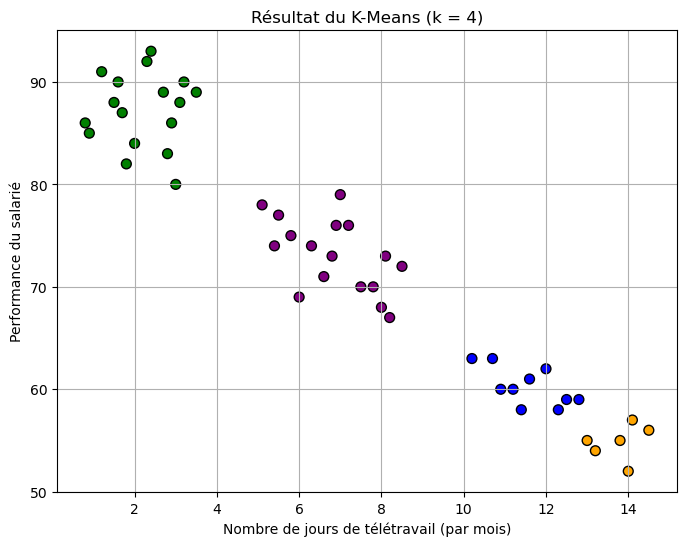



CENTROIDES : 

 [(11.559999999999999, 60.3), (13.766666666666666, 54.833333333333336), (2.1999999999999997, 87.23529411764706), (6.864705882352942, 73.05882352941177)] 

GROUPES : 

 [[[10.2, 63], [12.5, 59], [11.6, 61], [10.9, 60], [12.0, 62], [11.4, 58], [10.7, 63], [12.8, 59], [11.2, 60], [12.3, 58]], [[13.8, 55], [14.1, 57], [13.2, 54], [14.5, 56], [13.0, 55], [14.0, 52]], [[1.5, 88], [2.0, 84], [3.2, 90], [0.8, 86], [1.2, 91], [2.8, 83], [3.5, 89], [1.7, 87], [2.3, 92], [0.9, 85], [3.0, 80], [2.4, 93], [1.8, 82], [2.7, 89], [3.1, 88], [1.6, 90], [2.9, 86]], [[5.1, 78], [6.3, 74], [7.5, 70], [8.0, 68], [6.8, 73], [7.2, 76], [5.5, 77], [6.0, 69], [8.5, 72], [5.8, 75], [7.0, 79], [8.2, 67], [6.6, 71], [5.4, 74], [7.8, 70], [8.1, 73], [6.9, 76]]] 

ETIQUETTES : 

 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]


In [ ]:
kmeans(points,4)

In [ ]:
# Génération d’un dataset réaliste de 300 employés
pointest = []

# Cluster 1 : salariés très performants, peu de télétravail
for _ in range(100):
    x = round(random.uniform(0, 4), 1)    # peu de télétravail
    y = round(random.uniform(80, 100), 1) # performance élevée
    pointest.append([x, y])

# Cluster 2 : salariés moyens, télétravail modéré
for _ in range(100):
    x = round(random.uniform(4, 9), 1)    # télétravail modéré
    y = round(random.uniform(65, 85), 1)  # performance moyenne
    pointest.append([x, y])

# Cluster 3 : salariés moins performants, beaucoup de télétravail
for _ in range(100):
    x = round(random.uniform(9, 15), 1)   # beaucoup de télétravail
    y = round(random.uniform(50, 70), 1)  # performance plus faible
    pointest.append([x, y])


Itération n°1
Groupe 1 : [[6.3, 83.6], [7.1, 76.3], [5.5, 84.7], [8.0, 75.6], [7.3, 76.1], [8.4, 79.8], [7.4, 82.1], [7.2, 81.6], [7.5, 76.2], [8.7, 84.4], [7.4, 78.3], [8.4, 84.5], [7.7, 83.5], [8.6, 80.6], [6.1, 78.4], [8.6, 72.0], [8.1, 82.4], [7.4, 81.9], [6.9, 84.7], [5.7, 80.7], [6.2, 84.7], [8.0, 78.7], [8.7, 79.7], [8.7, 83.4], [7.1, 78.3], [6.5, 78.3], [7.3, 72.6], [8.2, 71.1], [6.2, 78.5], [6.6, 80.9], [8.8, 79.7], [7.3, 77.4], [7.1, 80.4], [6.3, 82.7], [6.9, 79.4], [8.5, 82.2], [8.4, 80.6], [7.5, 74.3], [6.8, 83.3]]
Groupe 2 : [[3.9, 97.1], [1.8, 96.7], [1.1, 98.5], [0.2, 96.4], [0.3, 98.3], [0.5, 97.7], [2.5, 96.8], [3.8, 98.4], [1.5, 99.7], [3.3, 99.6], [2.6, 98.9], [2.4, 99.3], [1.5, 98.0], [2.9, 97.6], [1.9, 97.5], [0.3, 96.2], [3.5, 98.0], [1.6, 98.5], [1.9, 98.4], [2.0, 97.0]]
Groupe 3 : [[8.7, 65.2], [6.5, 67.6], [5.7, 66.4], [8.7, 67.1], [8.4, 70.3], [6.5, 70.0], [8.5, 66.0], [7.5, 68.0], [5.2, 68.3], [8.0, 68.5], [6.1, 68.6], [7.7, 70.0], [5.9, 65.8], [6.4, 69.0], 

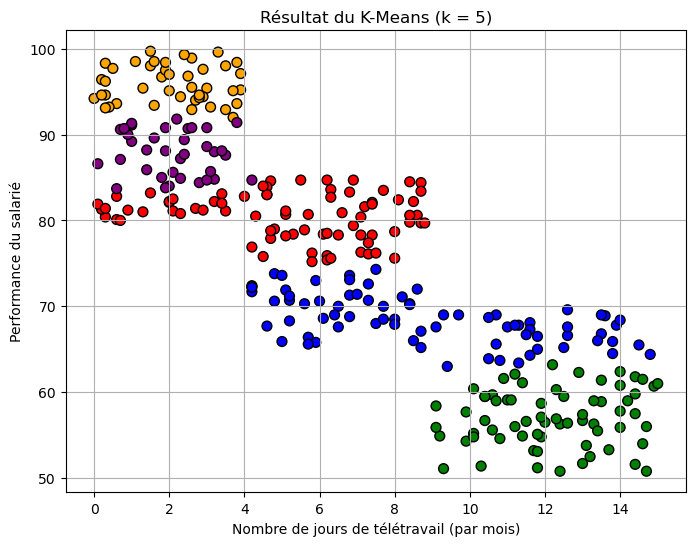



CENTROIDES : 

 [(8.831578947368422, 68.55263157894737), (2.083720930232558, 95.8906976744186), (12.199999999999998, 57.040298507462694), (2.102777777777778, 87.84999999999997), (5.187179487179489, 80.54358974358972)] 

GROUPES : 

 [[[6.8, 71.3], [5.6, 70.3], [8.7, 65.2], [6.5, 67.6], [5.7, 66.4], [5.2, 70.7], [8.7, 67.1], [8.4, 70.3], [4.8, 70.6], [5.1, 71.9], [6.5, 70.0], [8.5, 66.0], [4.2, 71.7], [4.8, 73.8], [7.5, 68.0], [4.2, 72.4], [6.8, 73.6], [4.2, 72.3], [4.2, 72.2], [5.2, 68.3], [8.0, 68.5], [6.1, 68.6], [7.7, 70.0], [5.9, 65.8], [6.4, 69.0], [8.6, 72.0], [6.0, 70.6], [5.7, 65.6], [8.4, 70.2], [5.0, 65.9], [5.0, 73.6], [6.8, 68.8], [7.3, 72.6], [7.7, 68.5], [6.8, 73.1], [8.2, 71.1], [7.0, 71.4], [7.3, 70.7], [5.2, 71.2], [8.0, 67.9], [5.9, 73.0], [7.5, 74.3], [4.6, 67.7], [13.9, 67.8], [11.6, 68.1], [13.5, 66.8], [10.7, 65.6], [11.6, 64.3], [13.6, 68.9], [9.1, 67.6], [11.3, 67.8], [13.4, 66.0], [11.3, 63.4], [13.8, 64.5], [14.0, 68.4], [11.6, 67.3], [11.0, 67.6], [10.7, 69

In [ ]:
kmeans(pointest,5)

In [ ]:
pointest2 = []

for i in range(300):
    # Nombre de jours de télétravail : entre 0 et 15
    x = round(random.uniform(0, 15), 1)

    # Performance dépend vaguement du télétravail, mais avec du bruit
    # On ajoute du "flou" pour rendre la séparation non évidente
    if x < 4:
        # parfois très performants, parfois non
        y = round(random.gauss(85 - x, 6), 1)
    elif x < 9:
        y = round(random.gauss(78 - (x / 2), 7), 1)
    else:
        y = round(random.gauss(70 - (x / 3), 8), 1)

    # On limite la performance entre 50 et 100
    y = max(50, min(100, y))

    pointest2.append([x, y])


Itération n°1
Groupe 1 : [[12.9, 72.5], [11.2, 72.2], [10.3, 70.6], [10.5, 75.3], [12.5, 76.9], [9.8, 71.1], [8.8, 71.4], [14.8, 70.5], [14.7, 80.1], [12.3, 75.2], [12.8, 75.2], [13.8, 70.1], [9.5, 72.9], [13.6, 79.1], [12.1, 75.8], [11.2, 76.7], [14.7, 79.3], [11.9, 75.9], [14.3, 71.5], [12.8, 75.6], [13.0, 71.0], [9.1, 72.8], [12.1, 78.2], [10.5, 71.5], [8.5, 70.6], [11.7, 75.4], [10.6, 73.5]]
Groupe 2 : [[2.8, 83.4], [0.8, 90.6], [6.0, 83.8], [0.8, 88.0], [2.2, 78.1], [1.8, 83.9], [3.4, 75.1], [6.6, 73.6], [3.2, 79.9], [2.6, 79.4], [1.1, 90.5], [4.4, 77.1], [1.1, 86.5], [7.4, 71.4], [1.2, 90.0], [4.8, 77.4], [3.8, 94.1], [4.0, 87.4], [7.1, 77.4], [5.2, 75.6], [4.8, 77.3], [2.8, 80.6], [5.4, 75.7], [3.1, 68.8], [3.6, 85.5], [1.4, 96.8], [6.9, 73.8], [1.8, 86.7], [7.6, 72.3], [3.7, 75.7], [6.8, 71.8], [4.8, 79.7], [3.5, 81.8], [0.6, 83.6], [6.1, 72.7], [7.0, 71.2], [4.7, 73.3], [0.5, 92.2], [1.5, 77.1], [4.4, 79.4], [5.6, 80.5], [2.1, 96.1], [6.9, 74.4], [0.1, 89.5], [2.4, 77.3], [6.

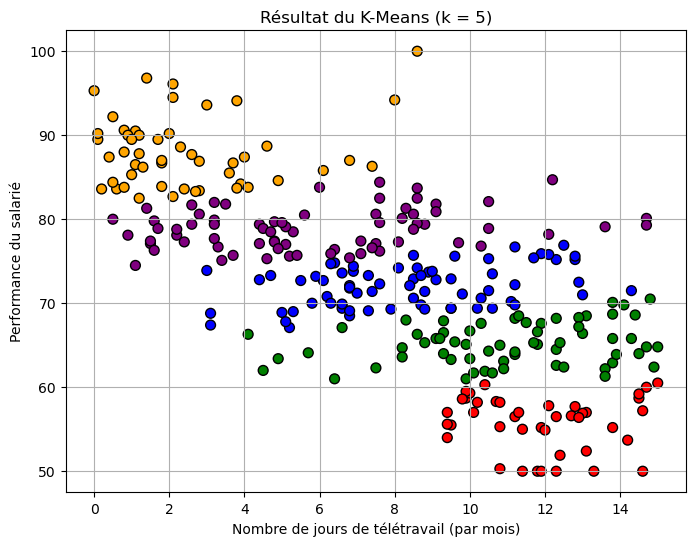



CENTROIDES : 

 [(8.3375, 72.00833333333334), (2.4699999999999998, 88.068), (10.964062499999995, 65.19687499999999), (5.931944444444446, 78.85833333333333), (11.902380952380952, 55.76428571428571)] 

GROUPES : 

 [[[6.6, 73.6], [12.9, 72.5], [3.1, 67.4], [8.9, 73.7], [6.8, 68.5], [11.2, 72.2], [8.5, 72.9], [10.3, 70.6], [10.5, 75.3], [7.4, 71.4], [12.5, 76.9], [9.8, 71.1], [8.8, 71.4], [5.0, 68.9], [3.1, 68.8], [6.6, 69.8], [6.9, 73.8], [7.6, 72.3], [8.1, 74.2], [5.2, 67.1], [6.8, 71.8], [10.6, 69.4], [12.3, 75.2], [6.1, 72.7], [7.0, 71.2], [12.8, 75.2], [4.7, 73.3], [9.5, 72.9], [6.9, 74.4], [12.1, 75.8], [6.6, 69.4], [9.6, 75.6], [6.4, 74.8], [5.8, 70.0], [8.6, 74.2], [11.2, 76.7], [5.3, 69.0], [6.6, 69.9], [8.7, 73.3], [4.4, 72.8], [5.5, 72.7], [11.9, 75.9], [6.8, 69.1], [6.3, 74.7], [6.2, 70.8], [14.3, 71.5], [12.8, 75.6], [13.0, 71.0], [9.1, 72.8], [9.5, 69.4], [6.8, 72.1], [6.8, 71.9], [11.1, 70.2], [8.4, 72.1], [8.7, 69.8], [10.5, 71.5], [8.5, 70.6], [9.5, 69.4], [6.3, 70.0], 

In [ ]:
kmeans(pointest2,5)